In [25]:
% reset
% config InlineBackend.figure_format = 'retina'

% matplotlib inline

# our imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

import statsmodels.api as sm
from scipy.stats import ttest_ind
from matplotlib import rcParams

import geocoder
import folium
from haversine import haversine
# import pyshp
# import shapefile



# rcParams['figure.figsize'] = 8, 6
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Tahoma']
# sns.set(style='whitegrid', context ='paper')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


{'SanDOW': 9937, 'SanMDC': 6246, 'SanPCF': 5677, 'SanSOT': 4969, 'SanGRE': 4579, 'SanCLA': 4388, 'SanMSS': 4131, 'SanUPT': 3985, 'SanMIR': 3254, 'SanMID': 3194, 'SanENC': 3006, 'SanOCN': 2897, 'SanOAT': 2684, 'SanSNS': 2563, 'SanSKY': 2553, 'SanUNV': 2529, 'SanNAV': 2489, 'SanPEN': 2407, 'SanLAJ': 2186, 'SanKER': 2002, 'SanMDW': 1784, 'SanLIN': 1759, 'SanCOL': 1681, 'SanMDS': 1478, 'SanMII': 1317, 'SanGRT': 1289, 'SanMIS': 1254, 'SanMSH': 1208, 'SanRNC': 1201, 'SanRAN': 1186, 'SanTIR': 1165, 'SanSER': 1092, 'SanCAR': 1080, 'SanOTM': 1025, 'SanBAR': 961, 'SanSCI': 642, 'SanRES': 611, 'SanBAL': 560, 'SanCRM': 526, 'SanTOR': 469, 'SanOLD': 349, 'SanMIL': 284, 'SanMRM': 253, 'SanSAB': 208, 'SanTRR': 194, 'SanBLA': 134, 'SanTOE': 112, 'SanPAC': 110, 'SanTIJ': 65, 'SanRAO': 37, 'SanSAN': 32, 'SanNCU': 21, 'SanDEL': 17, 'SanFAR': 16, 'SanLOS': 13, 'SanVID': 10}
{31759: 9937, 74062: 6246, 39849: 5677, 57358: 4969, 45697: 4579, 77873: 4388, 18947: 4131, 37279: 3985, 72761: 3254, 37348: 3194, 47

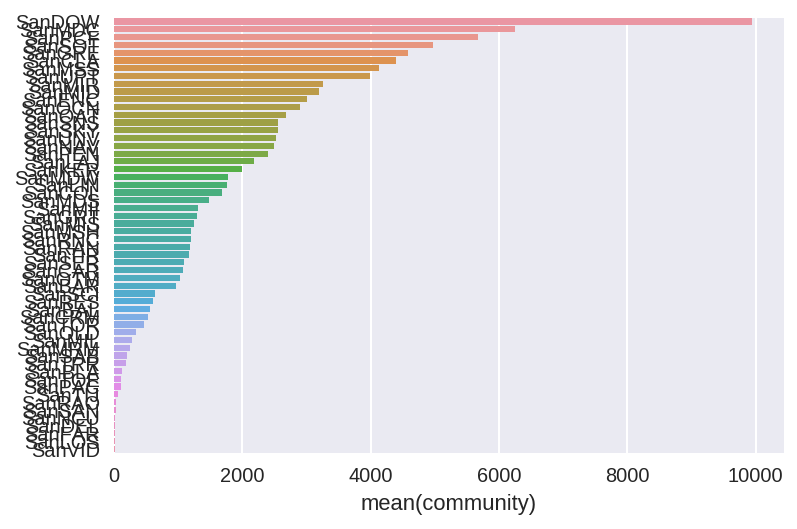

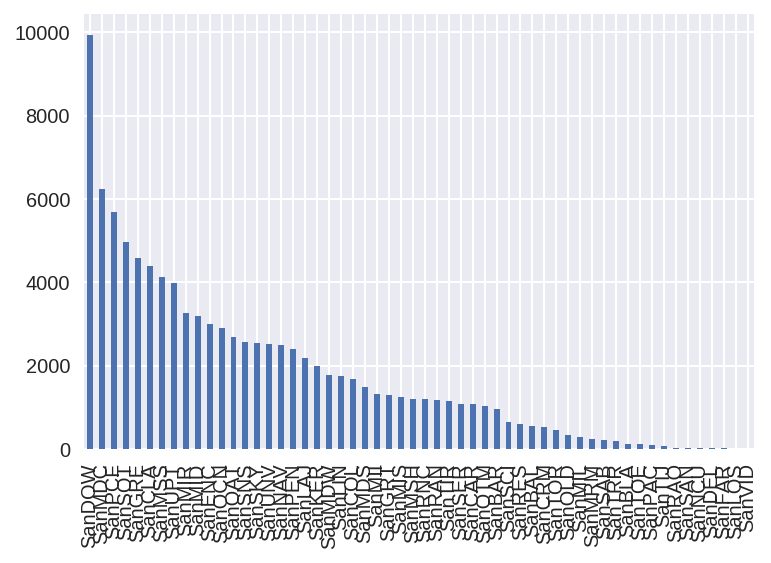

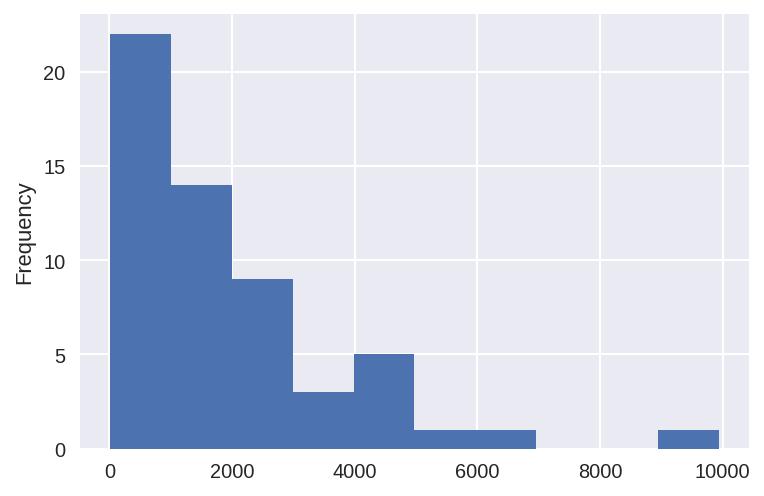

In [26]:
# import our incidents-100k dataset into a DataFrame
df = pd.read_csv("incidents-100k.csv")

# first remove any rows where the community is specified by NONE
# DATA CLEANING: remove rows that do not have a community specified, or community population
# print(df.shape)
df = df[df['community'] != 'NONE']
# print(df.shape)
df = df[df['comm_pop'] != 0]
# print(df.shape)

# get the community populations and plot as a bar graph to check normalization 
counts_by_community = df['community'].value_counts()
counts_by_pops = df['comm_pop'].value_counts()

comm_dict = counts_by_community.to_dict()
print(comm_dict)

pops_dict = counts_by_pops.to_dict()
print(pops_dict)

# check that the distribution of crimes/comm_pop is normal

# plotting in seaborn
# seaborn.countplot(x='community', data=comm_pops)
# print(df.community.value_counts().index)
sns.barplot(x=counts_by_community, y=counts_by_community.index)
sns.plt.show()

# sns.distplot(x=counts_by_pops.index, y=counts_by_pops)
# sns.plt.show()

counts_by_community.plot(kind="bar")
f1 = plt.show()

counts_by_community.plot(kind="hist")
# counts_by_community.plot(kind="bar")
f2 = plt.gcf()

In [21]:
assert f1.gca().has_data()
assert f2.gca().has_data()

In [27]:
# converted the "incidents-100k.csv" dataset into a geojson file using
# convertcsv.com webclient

SD_LONG_LAT = (32.7157, 117.1611)
community_geography = r'incidents-geo.geojson'

crime_by_comm = pd.DataFrame(df['community'].value_counts().astype(float))
crime_by_comm.to_json('crime_counts.json')
crime_by_comm = crime_by_comm.reset_index()
print(crime_by_comm)

crime_by_comm.columns = ['community', 'number']

# creation of the choropleth
choro_crime_comm = folium.Map(location=SD_LONG_LAT, zoom_start=10)
choro_crime_comm.geo_json(geo_path = community_geography, data_out = 'crime_counts.json',
                          data = crime_by_comm, columns = ['community', 'number'], 
                          key_on = 'feature.properties.COMMUNITY', fill_color = 'YlOrRd', 
                          fill_opacity = 0.7, line_opacity = 0.2, 
                          legend_name = 'Number of incidents per Community')
display(choro_crime_comm)


NameError: name 'crime_counts_comm' is not defined

In [24]:
# 2012 length --> 143182 for incidents 57
# 2012 length --> 13923 for incidents-100k.csv
# df_2012=df.loc[df['year']== 2012]
# df_2012['type'].value_counts()
# j = 0
# points = []
# for i in range (1000):
#    latitude = df['lat'][j]
#    longitude = df['lon'][j]
#    points.append(tuple([latitude,longitude]))
#    j = j + 1
#    g = geocoder.google([latitude, longitude], method='reverse')
#    if (g.state != 'CA'):
#        pass
#    else:     

In [ ]:
# df['lat']
csv_file = 'abc_licenses_sdcounty.csv'
df2 = pd.read_csv(csv_file)

In [ ]:
points2 = []
j=0
for i in range (1000):
    latitude = df2['lat'][j]
    longitude = df2['lon'][j]
    points2.append(tuple([latitude,longitude]))
    j = j + 1
    #g = geocoder.google([latitude, longitude], method='reverse')
    #if (g.state!='CA'):
    #    pass
    #else:
    

In [ ]:
# j = 0
# lat = 0
# lon = 0
# zoom_start=2
# m = folium.Map(location=[lat, lon], zoom_start=zoom_start)
# if (len(points)<(len(points2))):
#    length=(len(points))
# else:
#    length=(len(points2))
# for i in range(length):
#    coord_1 = points[j]
#    coord_2 = points2[j]
#    kw = dict(fill_color='red', radius=5)
#    kw2 = dict(fill_color='blue' ,radius=4)
#    c0 = folium.CircleMarker(coord_1, **kw)
#    c1 = folium.CircleMarker(coord_2, **kw2)
#    for c in [c0,c1]:
#        m.add_child(c)
#    j = j + 1

# folium.PolyLine(points, color="yellow", weight=1.5, opacity=1).add_to(m)
# m

In [ ]:
# building a choropleth map from our incidents-100k.csv dataset
# converted from csv to geojson format using the ogr2ogr web client, ogre.acd4gis.com 
# (too resource costly for notebook to handle)

# using the aggregate 2012 incidents shapefile to establish map boundaries 
# http://geospatialpython.com/2013/07/shapefile-to-geojson.html
# read in the shapefile using shapefile.Reader

# read_shp = shapefile.Reader("crime-incidents-2012.shp")
# shp_fields = read_shp.fields[1:]
# field_names = [field[0] for field in shp_fields]
# processShape = []
# for shape_records in read_shp.shapeRecords():
#        atr = dict(zip(shp_fields, shape_records.record))
#        geom = shape_records.shape.__geo_interface__
#        processShape.append(dict(type="Feature", geometry=geom, properties=atr)) 
   
# # write the GeoJSON file
# from json import dumps
# geojson = open("pyshp-demo.json", "w")
# geojson.write(dumps({"type": "FeatureCollection", "features": processShape}, indent=2) + "\n")
# geojson.close()